In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
df.shape

(30, 2)

In [6]:
### correlation

In [7]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


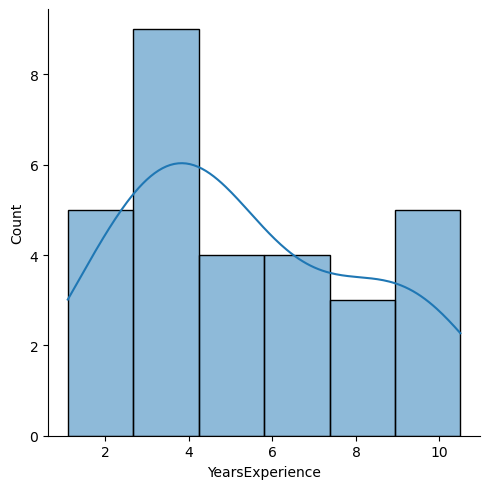

In [8]:
sns.displot(df['YearsExperience'],kde=True)

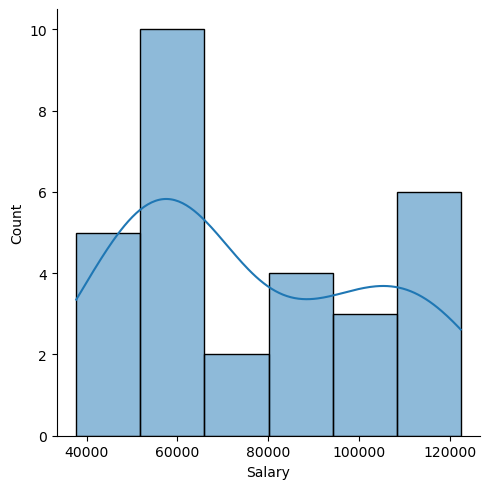

In [9]:
sns.displot(df['Salary'],kde=True)

In [10]:
###fitting the linear regression model

In [8]:
import statsmodels.formula.api as smf
model=smf.ols('YearsExperience~Salary',data=df).fit()

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           1.14e-20
Time:                        13:31:31   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
Salary         0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

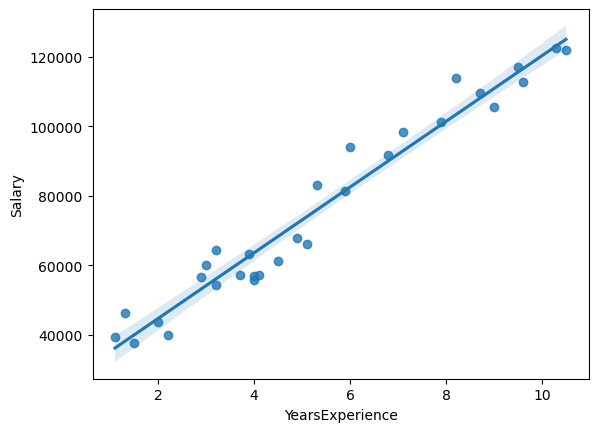

In [10]:
sns.regplot(x='YearsExperience',y='Salary',data=df)

In [11]:
####improve the model

In [12]:
model2=smf.ols("YearsExperience~np.log(Salary)",data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           7.03e-18
Time:                        13:31:36   Log-Likelihood:                -33.035
No. Observations:                  30   AIC:                             70.07
Df Residuals:                      28   BIC:                             72.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -77.6961      4.241    -18.322      0.000     -86.383     -69.009
np.log(Salary)     7.4288      0.379     19.585      0.000       6.652       8.206
==============================================================================
Omnibus:                        1.748   Durbin-Watson:                   1.348
Prob(Omnibus):                  0.417   Jarque-Bera (JB):                1.213
Skew:                          -0.227   Prob(JB):                        0.545
Kurtosis:                       2.126   Cond. No.                         347.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
model3=smf.ols("np.sqrt(YearsExperience)~(Salary)",data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     np.sqrt(YearsExperience)   R-squared:                       0.931
Model:                                  OLS   Adj. R-squared:                  0.929
Method:                       Least Squares   F-statistic:                     377.8
Date:                      Mon, 09 Jan 2023   Prob (F-statistic):           8.57e-18
Time:                              13:31:36   Log-Likelihood:                 11.557
No. Observations:                        30   AIC:                            -19.11
Df Residuals:                            28   BIC:                            -16.31
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5132      0.093      5.514      0.000       0.323       0.704
Salary      2.243e-05   1.15e-06     19.437      0.000    2.01e-05    2.48e-05
==============================================================================
Omnibus:                        1.393   Durbin-Watson:                   0.972
Prob(Omnibus):                  0.498   Jarque-Bera (JB):                0.958
Skew:                          -0.436   Prob(JB):                        0.619
Kurtosis:                       2.913   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
model4=smf.ols("np.log(YearsExperience)~Salary",data=df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     np.log(YearsExperience)   R-squared:                       0.854
Model:                                 OLS   Adj. R-squared:                  0.849
Method:                      Least Squares   F-statistic:                     163.6
Date:                     Mon, 09 Jan 2023   Prob (F-statistic):           3.25e-13
Time:                             13:31:37   Log-Likelihood:                0.92814
No. Observations:                       30   AIC:                             2.144
Df Residuals:                           28   BIC:                             4.946
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0942      0.133     -0.710      0.483      -0.366       0.178
Salary      2.104e-05   1.64e-06     12.792      0.000    1.77e-05    2.44e-05
==============================================================================
Omnibus:                        7.529   Durbin-Watson:                   0.461
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                5.772
Skew:                          -0.923   Prob(JB):                       0.0558
Kurtosis:                       4.099   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
FINAL_MODEL=smf.ols("np.log(YearsExperience)~Salary",data=df).fit()
FINAL_MODEL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     np.log(YearsExperience)   R-squared:                       0.854
Model:                                 OLS   Adj. R-squared:                  0.849
Method:                      Least Squares   F-statistic:                     163.6
Date:                     Mon, 09 Jan 2023   Prob (F-statistic):           3.25e-13
Time:                             13:31:37   Log-Likelihood:                0.92814
No. Observations:                       30   AIC:                             2.144
Df Residuals:                           28   BIC:                             4.946
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0942      0.133     -0.710      0.483      -0.366       0.178
Salary      2.104e-05   1.64e-06     12.792      0.000    1.77e-05    2.44e-05
==============================================================================
Omnibus:                        7.529   Durbin-Watson:                   0.461
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                5.772
Skew:                          -0.923   Prob(JB):                       0.0558
Kurtosis:                       4.099   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
##coefficents

In [17]:
FINAL_MODEL.params

Intercept   -0.094207
Salary       0.000021
dtype: float64

In [18]:
###t and p values

In [19]:
print(FINAL_MODEL.tvalues, '\n',FINAL_MODEL.pvalues)

Intercept    -0.710225
Salary       12.791989
dtype: float64 
 Intercept    4.834387e-01
Salary       3.250155e-13
dtype: float64


In [20]:
### r squared

In [21]:
FINAL_MODEL.rsquared

0.8538888828756969

In [22]:
FINAL_MODEL.rsquared_adj

0.8486706286926861

In [23]:
### manual prediction

In [24]:
delivey=(  -0.094207)+( 0.000021)*39891.0
delivey

0.7435039999999999

In [25]:
###  automatic prediction

In [26]:
new_data=pd.Series([39891.0,63218.0])
new_data

0    39891.0
1    63218.0
dtype: float64

In [27]:
data_pred=pd.DataFrame(new_data,columns=['Salary'])
data_pred

,Salary
0,39891.0
1,63218.0


In [28]:
FINAL_MODEL.predict(data_pred)

0    0.745143
1    1.235969
dtype: float64